# Preamble

In [1]:
from instrumental import Q_,u,instrument
import numpy as np
import matplotlib.pyplot as plt
from time import time, sleep

%matplotlib notebook

In [3]:
############# connect to instruments ###############

### load functions to call Ibsen Eagle server 
# from IbsenEagle_client import get_wl, get_sp

### connect to NIDAQ
daq = instrument(module='daq.ni',serial=14995354,name='Dev1')

### connect to Rigol 200 MHz scope
# scope_params = {"visa_address":"TCPIP::192.168.1.28::INSTR",
#                 "module":"scopes.rigol"}
# scope = instrument(**scope_params)

# ### connect Thorlabs PM101A headless USB power meter
# pm_params = {"module":"powermeters.thorlabs",
#              "visa_address":"USB0::0x1313::0x8076::M00553791::INSTR"}
# from instrumental.drivers.powermeters.thorlabs import PM101A
# pm = PM101A(**pm_params)

In [4]:
daq

In [95]:
import sys,os

### connect Thorlabs Zelux compact scientific CMOS camera
cam_serial = "09924"
TL_SDK_PATH = "C:/Program Files/Thorlabs/Scientific Imaging/Scientific Camera Support/Scientific Camera Interfaces/SDK/Python Compact Scientific Camera Toolkit"
TL_SDK_EX_PATH = "C:/Program Files/Thorlabs/Scientific Imaging/Scientific Camera Support/Scientific Camera Interfaces/SDK/Python Compact Scientific Camera Toolkit/examples"
sys.path.append( os.path.normpath( TL_SDK_PATH ) )
sys.path.append( os.path.normpath( TL_SDK_EX_PATH ) )

# # if on Windows, use the provided setup script to add the DLLs folder to the PATH
from windows_setup import configure_path
configure_path()
from thorlabs_tsi_sdk.tl_camera import TLCameraSDK, OPERATION_MODE
sdk = TLCameraSDK()
cam = sdk.open_camera(cam_serial)

TLCameraError: TLCameraSDK is already in use. Please dispose of the current instance before trying to create another

In [3]:
# close everything
# scope.close()
# pm.close()
import numpy as np

In [7]:
#### define functions for galvos

V0 = np.array([2.53 , 1.61]) * u.volt

def center_beam(V0=V0):
    daq.ao0.write(V0[0])
    daq.ao1.write(V0[1])

center_beam()

# SHG Signal

## Power dependence

In [13]:
P_ω = (np.array([50,26,30,40,10,20,5,60])*u.mW).to(u.watt) # Mira ave power, pre-dicho, obj., 4x silver mirrors
V_femto_offset = 0.045*u.volt #measured power with laser blocked
V_femto = np.array([6.3,1.5,2.2,4.1,0.2,0.92,0.1,10.0])* u.volt - V_femto_offset
resp_PDF10A_430nm = 0.2 *u.ampere/u.watt
g_TIA_PDF10A = 1e12*u.volt / u.ampere
P_2ω = (V_femto / g_TIA_PDF10A / resp_PDF10A_430nm).to(u.watt)

<IPython.core.display.Javascript object>


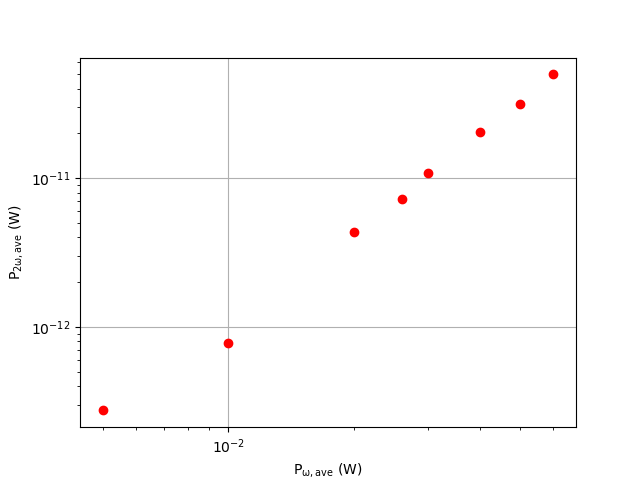

C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'P$_{\\rm \\omega, ave}$ (W)')

In [14]:
fig,ax = plt.subplots(1,1)
ax.loglog(P_ω,P_2ω,'ro')
ax.grid()
ax.set_ylabel(r"P$_{\rm 2\omega, ave}$ (W)")
ax.set_xlabel(r"P$_{\rm \omega, ave}$ (W)")

In [42]:
#################################################################################
# measure transmission of path between power meter and objective, and objective
# Mira, CW @ 869nm
# polarization fixed to "horizontal" (parllel to plane of vertical breadboard)
# galvo mirrors set to "center", although obj. trans. only roughly maximized
#################################################################################

# pm.set_num_averaged(100)
# pm.set_wavelength(869*u.nm)

# inital power measurement, before last silver mirror before SHG/excitation Dichroic
#P_cal0 = pm.get_power().to(u.mW)
print(f'P_cal0: {P_cal0:3.3f}')

# power just before objective back aperture, 50/50 BS removed
#P_cal1 = pm.get_power().to(u.mW)
print(f'P_cal1: {P_cal1:3.3f}')

#T_PM_to_obj_NIR = (P_cal1 / P_cal0).to(u.dimensionless).m
print(f'T_PM_to_obj_NIR: {T_PM_to_obj_NIR:3.3f}') 

# power just before objective back aperture, 50/50 BS in place
# P_cal2 = pm.get_power().to(u.mW)
print(f'P_cal2: {P_cal2:3.3f}')

# T_BS_NIR = (P_cal2 / P_cal1).to(u.dimensionless).m # P-polarized relative to cube
print(f'T_BS_NIR: {T_BS_NIR:3.3f}')

# power after Mitutoyo 100x NIR objective (NA=0.5,old black and silver) ~3mm below focus, 50/50 BS removed
# P_cal3 = pm.get_power().to(u.mW)
print(f'P_cal3: {P_cal3:3.3f}')

#T_Mitutoyo100NIR_869 = (P_cal3 / P_cal1).to(u.dimensionless).m # reference to P1, back aperture w/o imaging BS cube
print(f'T_Mitutoyo100NIR_869: {T_Mitutoyo100NIR_869:3.3f}')


# power after Mitutoyo 50x (non-NIR, NA=0.55) objective ~3mm below focus, 50/50 BS removed
P_cal4 = pm.get_power().to(u.mW)
print(f'P_cal4: {P_cal4:3.3f}')

T_Mitutoyo50_869 = (P_cal4 / P_cal1).to(u.dimensionless).m # reference to P1, back aperture w/o imaging BS cube
print(f'T_Mitutoyo50_869: {T_Mitutoyo50_869:3.3f}')


# P_cal5 = pm.get_power().to(u.mW)
# print(f'P_cal5: {P_cal5:3.3f}')



# P_cal0: 11.296 milliwatt
# P_cal1: 9.782 milliwatt
# T_PM_to_obj_NIR: 0.866
# P_cal2: 4.906 milliwatt
# T_BS_NIR: 0.501
# P_cal3: 7.376 milliwatt
# T_Mitutoyo100NIR_869: 0.754
# P_cal4: 6.812 milliwatt
# T_Mitutoyo50_869: 0.696


P_cal0: 11.296 milliwatt
P_cal1: 9.782 milliwatt
T_PM_to_obj_NIR: 0.866
P_cal2: 4.906 milliwatt
T_BS_NIR: 0.501
P_cal3: 7.376 milliwatt
T_Mitutoyo100NIR_869: 0.754
P_cal4: 6.812 milliwatt
T_Mitutoyo50_869: 0.696


In [46]:
pm.get_power()

0.0565296 <Unit('watt')>

In [29]:
pm.set_wavelength(869*u.nm)

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 'set_wavelength' is deprecated and will be removed in future versions of Instrumental. Please use 'wavelength' instead.
  """Entry point for launching an IPython kernel.


## Polarization dependence

In [19]:
V_femto_offset = 0.08*u.volt #measured power with laser blocked
θ_HWP = np.array([219,210,200,190,180,170,160,150,140,130,120,110,100,90,80,70,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,0,10,20,30,40,50,60,70,5,15,25,35,45,55,65,75,85,95])
V_femto_θ = np.array([8.0,7.1,4.45,1.78,0.4,0.3,1.24,3.5,6.8,8.4,7.5,4.5,1.65,0.34,0.33,1.2,8.0,6.2,3.2,1.28,0.35,0.35,1.67,4.5,7.6,8.6,6.9,3.6,1.3,0.36,0.41,0.41,1.7,4.4,7.4,8.3,6.1,3.3,1.17,0.96,2.94,5.85,7.9,7.25,4.57,1.95,0.51,0.22,0.72])* u.volt - V_femto_offset
resp_PDF10A_430nm = 0.2 *u.ampere/u.watt
g_TIA_PDF10A = 1e12*u.volt / u.ampere
P_2ω_θ = (V_femto_θ / g_TIA_PDF10A / resp_PDF10A_430nm).to(u.watt)

<IPython.core.display.Javascript object>


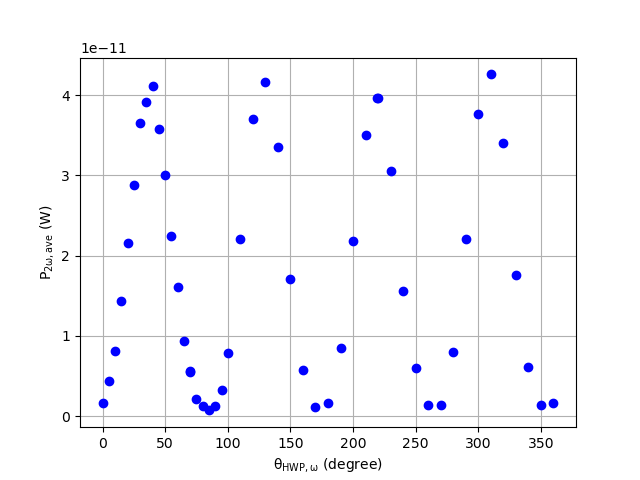

C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'θ$_{\\rm HWP, \\omega}$ (degree)')

In [22]:
fig,ax = plt.subplots(1,1)
ax.plot(θ_HWP,P_2ω_θ,'bo')
ax.grid()
ax.set_ylabel(r"P$_{\rm 2\omega, ave}$ (W)")
ax.set_xlabel(r"θ$_{\rm HWP, \omega}$ (degree)")

In [11]:
# fixing polarization relative to microscope axes

# PBS with known axes mounted in place of objective
# transmission only along axis parallel to vertical breadboard holding objective, camera, etc.
# calibration done in ps mode at 868.5nm with Newport 10RP02 zero-order@865 HWP modifying input NIR pol.

# transmitted light @ 870 extinguished for HWP angles:
θ_HWP_vert1 = 84*u.deg # maybe 83.5, hard to tell for sure
θ_HWP_vert0 = 353.5*u.deg - 360*u.deg # make negative for averaging below
θ_HWP_vert2 = 173*u.deg

# assume NIR exitation light is "horizontal" (parallel to vertical breadboard plane) in between these minima:

θ_HWP_hor0 = (θ_HWP_vert0 + θ_HWP_vert1)/2.
θ_HWP_hor1 = (θ_HWP_vert1 + θ_HWP_vert2)/2.

print(f"θ_HWP_hor0: {θ_HWP_hor0:3.3f}")
print(f"θ_HWP_hor1: {θ_HWP_hor1:3.3f}")



θ_HWP_hor0: 38.750 degree
θ_HWP_hor1: 128.500 degree


## Laser spectrum

In [67]:
### collect Mira spectrum
# λ_ω = get_wl()
# cts = get_sp()

### grab scope trace showing Mira pulses
# t_pulses,V_pulses = scope.get_data()

### save spectrum and scope trace data for modifying plot later
fname = 'mira_spec_and_pulses.npz'
# np.savez(fname,λ_ω=λ_ω,cts=cts,t_pulses=t_pulses,V_pulses=V_pulses)

### load data
mira_data = np.load(fname)
λ_ω = mira_data["λ_ω"]
cts = mira_data["cts"]
t_pulses = mira_data["t_pulses"]
V_pulses = mira_data["V_pulses"]

<IPython.core.display.Javascript object>


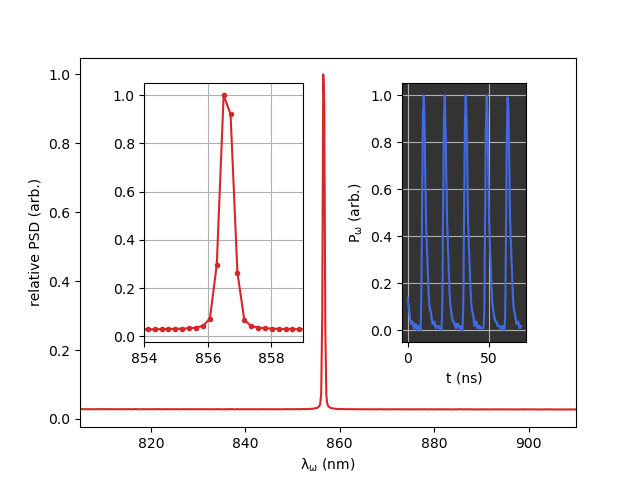

Text(0.5, 0, 't (ns)')

In [65]:
# plot Mira spectrum and pulse train
λ_lim = 805,910
λ_lim_ins = 854,859
bbox_ins0 = [0.13,0.23,0.32,0.7] # x0, y0, dx, dy
color = 'C3'
bbox_ins1 = [0.65,0.23,0.25,0.7] # x0, y0, dx, dy
color_pulses = 'royalblue'

# plot spectrum
PSD_rel = cts / (1.0 * cts.max())
fig,ax = plt.subplots(1,1)
ax.plot(λ_ω,PSD_rel,'-',color=color)
ax.set_ylabel(r"relative PSD (arb.)")
ax.set_xlabel(r"λ$_{\rm ω}$ (nm)")
ax.set_xlim(λ_lim)

# plot spectrum zoom
ax_ins0 = ax.inset_axes(bbox_ins0)
ax_ins0.grid()
ax_ins0.plot(λ_ω,PSD_rel,'.-',color=color)
ax_ins0.set_xlim(λ_lim_ins)

# plot scope trace 
P_ω_rel = np.array(V_pulses)/np.array(V_pulses).max()
ax_ins1 = ax.inset_axes(bbox_ins1,facecolor='0.2')
ax_ins1.grid()
ax_ins1.plot(t_pulses*1e9,P_ω_rel,'-',color=color_pulses)
ax_ins1.set_ylabel(r"P$_{\rm ω}$ (arb.)")
ax_ins1.set_xlabel(r"t (ns)")
# ax_ins1.set_xlim(λ_lim_ins)

## SHG spectrum

In [47]:
# open Ibsen Pebble UV spectrometer
from instrumental.drivers.spectrometers.ibsen import Eagle  # still need to make separate Pebble class
uv_spec_params = {"visa_address":"ASRL6::INSTR"}
uv_spec = Eagle(**uv_spec_params)

In [81]:
#### collect some spectra

# spec0 = uv_spec.spectrum() # input fiber not plugged into anything, lights on

# spec1 = uv_spec.spectrum() # 405nm alignment laser coupled to input fiber, just to check it works

# spec2 = uv_spec.spectrum() # at long last, the SHG spectrum

## collect Mira spectrum to compare with spec2
# λ_ω = get_wl()
# spec2_ω = get_sp()

# spec3 = uv_spec.spectrum() # at long last, the SHG spectrum
# spec3_ω = get_sp()


# spec4 = uv_spec.spectrum() # at long last, the SHG spectrum
# spec4_ω = get_sp()

spec5 = uv_spec.spectrum() # UV spectrum while MIRA is lasing CW, to check that the signal is really SHg and not a diff. grating order

<IPython.core.display.Javascript object>


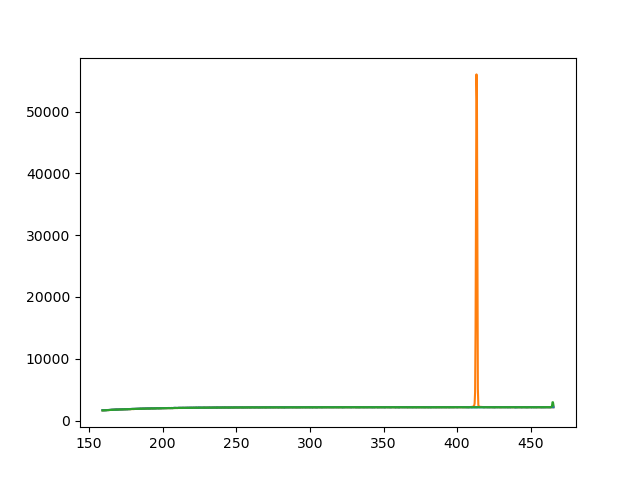

In [69]:
plt.plot(uv_spec.wl,spec0,color='C0',label="no input")
ax = plt.gca()
ax.plot(uv_spec.wl,spec1,color='C1',label="405 nm test")

<IPython.core.display.Javascript object>


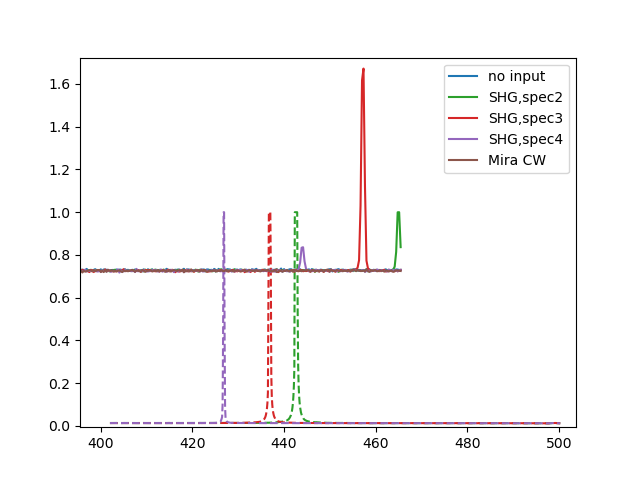

In [141]:
fig,ax = plt.subplots(1,1)
ax.plot(uv_spec.wl,spec0/spec2.max(),color='C0',label="no input")
ax.plot(uv_spec.wl,spec2/spec2.max(),color='C2',label="SHG,spec2")
ax.plot(λ_ω/2.,spec2_ω/spec2_ω.max(),color='C2',ls ='--')

ax.plot(uv_spec.wl,spec3/spec2.max(),color='C3',label="SHG,spec3")
ax.plot(λ_ω/2.,spec3_ω/spec3_ω.max(),color='C3',ls ='--')

ax.plot(uv_spec.wl,spec4/spec2.max(),color='C4',label="SHG,spec4")
ax.plot(λ_ω/2.,spec4_ω/spec4_ω.max(),color='C4',ls ='--')

ax.plot(uv_spec.wl,spec5/spec2.max(),color='C5',label="Mira CW")

ax.legend()

In [144]:
fname='SHG_spectra'
λ_2ω=uv_spec.wl
np.savez(fname,λ_ω=λ_ω,λ_2ω=λ_2ω,spec0=spec0,spec1=spec1,spec2=spec2,spec3=spec3,spec4=spec4,spec5=spec5,spec2_ω=spec2_ω,spec3_ω=spec3_ω,spec4_ω=spec4_ω)

# Imaging

## Spot size

In [21]:
# 900nm spot FWHM

dx_pix = 3.45*u.um # approx
fwhm_pix = 12 # approx
mag = 50 # 100x NIR Mitutoyo with 100mm tube lens
fwhm = fwhm_pix * dx_pix / mag
fwhm

0.8280000000000001 <Unit('micrometer')>

array([0.13888889, 0.13888889, 0.12037037, ..., 0.01851852, 0.01851852,
       0.01851852])

# Poling

## HV Amp test

In [24]:
### Resistances in current/voltage sense circuit added outside HV Amp ###
R_protect = 1.98 * u.Mohm
R_sense = 248 * u.kohm 
# Voltage divider resistors: Vsense = (V+ - V-) * R2 / ( R1 + R2 )
R1 = 20.7 * u.Mohm
R2 = 2 * u.Mohm
V_div = ( R2 / (R1 + R2) ).to(u.dimensionless).m
print(f'V_div: {V_div:3.3f}')

### Power supply ###
V_ps = 24.66 * u.volt


V_div: 0.088


In [26]:
####### Test 0 #########

### Input: Agilent 3633A 0-20V programmable DC power supply ###
### Load: 54 MOhm chain of ~10MOhm 0.25W resistors

#input voltage
V_in = np.array([.005,0.1,0.5,1.0,2.0,3.0,4.0,5.,6.,7,8,9,10,11]) * u.volt

# voltage across R_sense, monitors current
V_sense = np.array([-0.009,0.154,0.83,1.75,3.51,5.27,7.04,8.8,10.57,12.34,14.11,15.85,16.6,16.6]) * u.volt

# voltage across test load
V_load = np.array([-0.25,5.9,30.4,61.1,122,184,246,307,369,431,492,553,579,579]) * u.volt

# voltage at voltage divider port
V_div = np.array([-0.01,0.18,0.96,1.92,3.86,5.8,7.75,9.7,11.65,13.61,15.56,17.48,18.3,18.3]) * u.volt

R_load = 54 * u.Mohm
R_tot = R_protect + 1 / ( 1 / ( R1 + R2 ) + 1 / ( R_load + R_sense ) ) # ~ 18 Mohm
I_sense = (V_sense / R_sense).to(u.ampere)

<IPython.core.display.Javascript object>


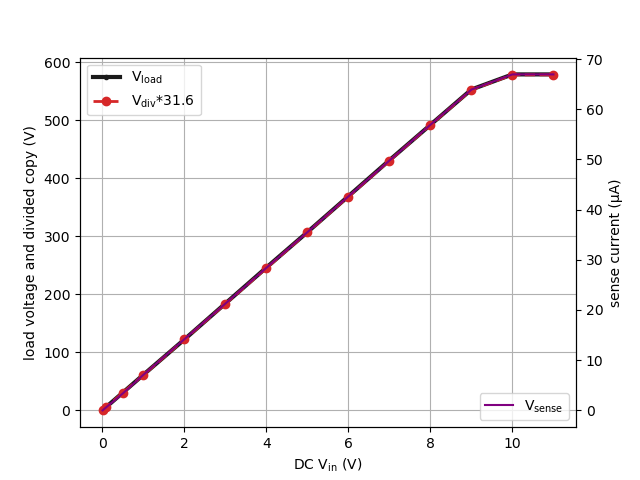

C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'sense current (μA)')

In [49]:
fig,ax = plt.subplots(1,1)
C1 = 'yellow'
C2 = 'C3'
C4 = 'purple'
C_load = '0.1'
factor = 31.6

# ax.plot(V_in,V_sense,'.-',label=r'V$_{\rm sense}$',color=C4)

ax.plot(V_in,V_load,'.-',lw=3,label=r'V$_{\rm load}$',color=C_load)
ax.plot(V_in,V_div*factor,'--o',lw=2,label=r'V$_{\rm div}$'+ f'*{factor}',color=C2)
ax_t = ax.twinx()
ax_t.plot(V_in,I_sense.to(u.microampere),label=r'V$_{\rm sense}$',color=C4)
ax_t.legend(loc='lower right')
ax.legend()
ax.grid()
ax.set_xlabel(r'DC V$_{\rm in}$ (V)')
ax.set_ylabel('load voltage and divided copy (V)')
ax_t.set_ylabel('sense current (μA)')

In [3]:
### Test 1 ### 

### Input: +-2V Triangle wave from cheap fn generator ###
### Load: 54 MOhm chain of ~10MOhm 0.25W resistors

def grab_traces():
    scope.single_acq()
    t,V1 = scope.get_data(ch=1)  # input waveform
    t,V2 = scope.get_data(ch=2)  # voltage divider port
    t,V4 = scope.get_data(ch=4)  # sense resistor voltage
    return t, V1, V2, V4

t,V1,V2,V4 = grab_traces()


<IPython.core.display.Javascript object>


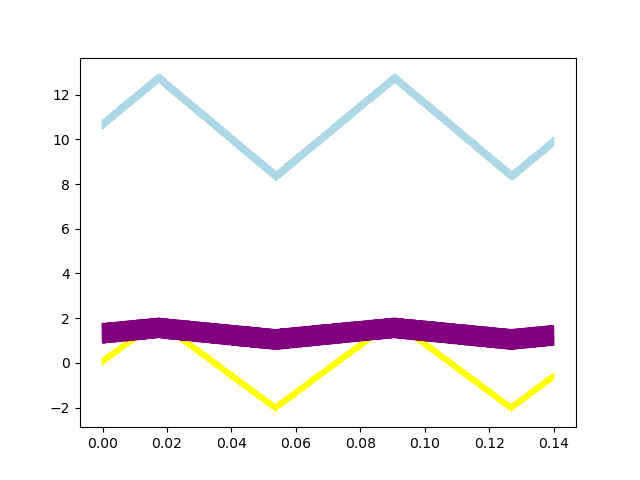

In [4]:
fig,ax = plt.subplots(1,1)
C1 = 'yellow'
C2 = 'lightblue'
C4 = 'purple'
ax.plot(t,V1,color=C1)
ax.plot(t,V2,color=C2)
ax.plot(t,V4,color=C4)

In [16]:
### Test 2 ### 

### Input: +-2V Triangle wave from cheap fn generator ###
### Load: open



t_2,V1_2,V2_2,V4_2 = grab_traces()



<IPython.core.display.Javascript object>


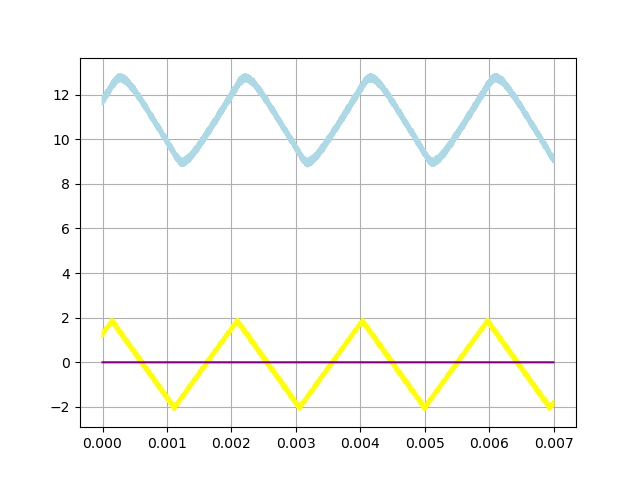

In [17]:
fig,ax = plt.subplots(1,1)
C1 = 'yellow'
C2 = 'lightblue'
C4 = 'purple'
ax.plot(t_2,V1_2,color=C1)
ax.plot(t_2,V2_2,color=C2)
ax.plot(t_2,V4_2,color=C4)
ax.grid()

In [18]:
### Test 3 ### 

### Input: +-2V Triangle wave from cheap fn generator ###
### Load: open
t_3,V1_3,V2_3,V4_3 = grab_traces()


<IPython.core.display.Javascript object>


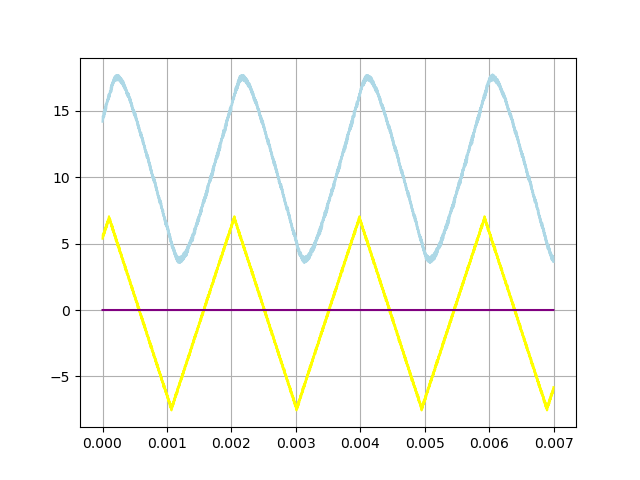

In [19]:
fig,ax = plt.subplots(1,1)
C1 = 'yellow'
C2 = 'lightblue'
C4 = 'purple'
ax.plot(t_3,V1_3,color=C1)
ax.plot(t_3,V2_3,color=C2)
ax.plot(t_3,V4_3,color=C4)
ax.grid()

In [21]:
### Test 4 ### 

### Input: +-2V Triangle wave from cheap fn generator ###
### Load: open
t_4,V1_4,V2_4,V4_4 = grab_traces()


<IPython.core.display.Javascript object>


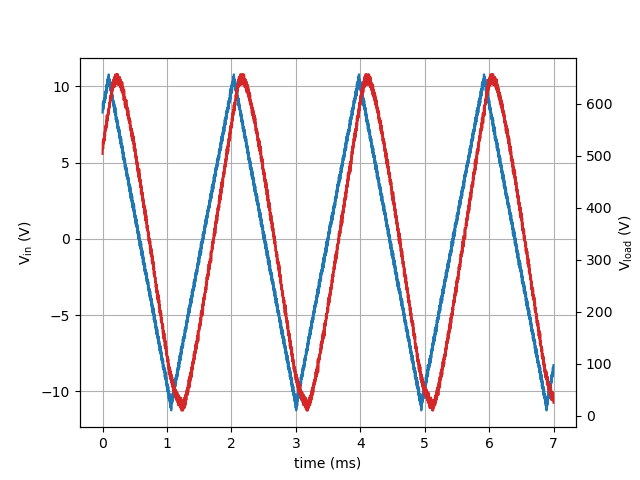

Text(0, 0.5, 'V$_{\\rm load}$ (V)')

In [57]:
fig,ax = plt.subplots(1,1)
C1 = 'C0'
C2 = 'C3'
factor = 31.6

ax.plot(t_4*1e3,V1_4,color=C1,label=r'V$_{\rm in}$')
ax_t = ax.twinx()
ax_t.plot(t_4*1e3,np.array(V2_4)*factor,color=C2,label=r'V$_{\rm load}$')
ax.grid()
#ax.legend()


ax.set_xlabel(r'time (ms)')
ax.set_ylabel(r'V$_{\rm in}$ (V)')
ax_t.set_ylabel(r'V$_{\rm load}$ (V)')


In [5]:
daq.ao0.write(0)
daq.ao1.write(0)

In [115]:
daq.ao0.read()

0.0005547654129806484 <Unit('volt')>

In [116]:
daq.close()

In [8]:
# define parameterized pulse sequence fn

def poling_pulses(amp_init=200*u.volt,n_init=10,amp_final=250*u.volt,gain=40,f_samp=100*u.kHz,negate=False):
    t_end = ( ( 6 * n_init ) + 10 ) * u.ms
    t = np.linspace(0,t_end.m, int((t_end*f_samp).to(u.dimensionless).m) + 1) * u.ms
    V = np.zeros(len(t))*u.volt
    
    def f_init_up0(tt):
        return (tt * amp_init).to(u.volt)
    
    def f_init_down(tt):
        return  ( ( ( 3 - tt ) ) * amp_init ).to(u.volt).m
    
    def f_init_up1(tt):
        return  ( ( ( -6 + tt ) ) * amp_init ).to(u.volt).m
    
    def f_final_up(tt):
        return (tt * amp_final).to(u.volt).m
    
    def f_final_down(tt):
        return  ( ( ( 3 - tt ) ) * amp_final ).to(u.volt).m
    
    # loop over init pulse pairs
    for i in range(n_init):
        t_mask = ( t > ( i * 6*u.ms ) ) *  ( t < ( (i+1) * 6*u.ms ) ) 
        t_rel = t[t_mask].m - np.min(t[t_mask].m)
        init_pulses = np.piecewise(t_rel,
                                   [t_rel<1.,(t_rel>=1.)*(t_rel<2.),(t_rel>=2.)*(t_rel<4.),(t_rel>=4.)*(t_rel<5.),t_rel>=5.],
                                   [f_init_up0,amp_init.m,f_init_down,-amp_init.m,f_init_up1],
                                  )
        V[t_mask] = init_pulses * u.volt
    # add final poling pulse
    t_mask = ( t >= ( n_init * 6*u.ms ) ) * ( t < ( ( n_init + 0.5 ) * 6*u.ms ) )  
    t_rel = t[t_mask].m - np.min(t[t_mask].m)
    final_pulse = np.piecewise(t_rel,
                               [t_rel<1.,(t_rel>=1.)*(t_rel<2.),t_rel>=2.],
                               [f_final_up,amp_final.m,f_final_down],
                              )
    V[t_mask] = final_pulse * u.volt
    if negate:
        return t, -V/gain
    else:
        return t, V/gain
    



C:\Users\User\Miniconda3\lib\site-packages\numpy\lib\function_base.py:628: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y[condlist[k]] = item(vals, *args, **kw)


<IPython.core.display.Javascript object>


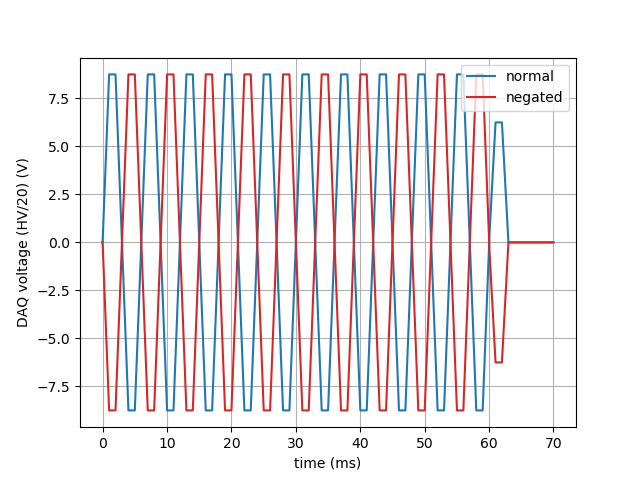

C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\User\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


In [9]:
amp_init=350*u.volt
amp_final=250*u.volt
t,Vp = poling_pulses(amp_init=amp_init,amp_final=amp_final)
t,Vn = poling_pulses(amp_init=amp_init,amp_final=amp_final,negate=True)
fig,ax = plt.subplots(1,1)
ax.plot(t,Vp,'-',color='C0',label='normal')
ax.plot(t,Vn,'-',color='C3',label='negated')
ax.set_xlabel('time (ms)')
ax.set_ylabel('DAQ voltage (HV/20) (V)')
ax.grid(True)
ax.legend()

In [49]:
daq.ao0.write(Vp,duration='70ms',fsamp='100kHz')

DAQError: (-89137) Specified route cannot be satisfied, because it requires resources that are currently in use by another route.
Property: DAQmx_SampClk_Src
Property: DAQmx_SampClk_ActiveEdge
Source Device: Dev1
Source Terminal: ao/SampleClockTimebase

Required Resources in Use by
Task Name: _unnamedTask<14>
Source Device: Dev1
Source Terminal: ai/SampleClock
Destination Device: Dev1
Destination Terminal: ao/SampleClock

Task Name: _unnamedTask<1C>

Status Code: -89137

In [14]:
daq.ao2.write(Vn,duration='70ms',fsamp='100kHz')

In [47]:
daq.ai0.read()

-3.0336068684613275 <Unit('volt')>

In [48]:
daq.ai1.read()

-2.5291471058215222 <Unit('volt')>

In [15]:
len(Vp)

7001

In [6]:
from instrumental.drivers.daq.ni import Task

<IPython.core.display.Javascript object>


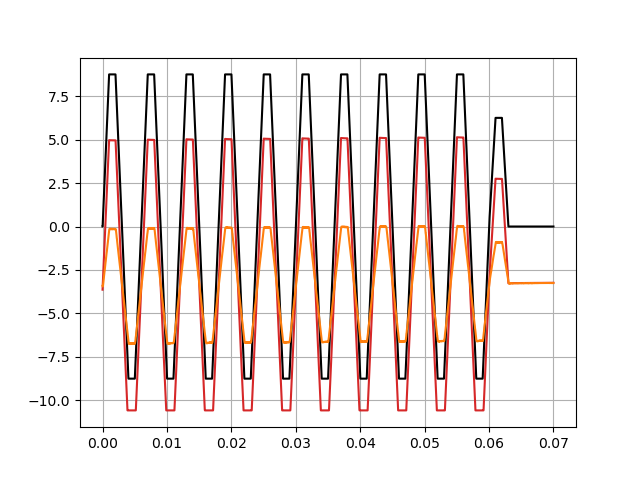

In [14]:
task = Task(daq.ao0, daq.ai0, daq.ai1)
task.set_timing(duration='70ms',fsamp='100kHz')
write_data = {'ao0':Vp}
task_out = task.run(write_data)
t_task = task_out["t"]
Vai0_task = task_out["Dev1/ai0"]
Vai1_task = task_out["Dev1/ai1"]
# plot task data
fig,ax = plt.subplots(1,1)

ax.plot(t.to(u.second).m,Vp.m,'k')
ax.plot(t_task.m,Vai0_task.m,'C3')
ax.plot(t_task.m,Vai1_task.m,'C1')

ax.grid()

<IPython.core.display.Javascript object>


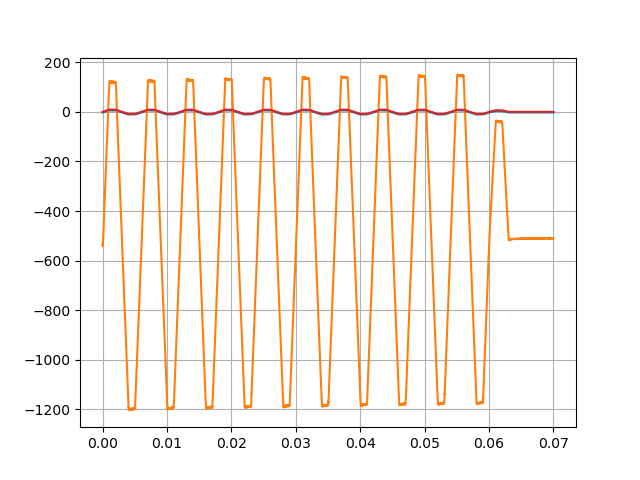

In [53]:
# plot task data
fig,ax = plt.subplots(1,1)
ax.plot(t_task.m,Vai0_task.m,'C0')
ax.plot(t_task.m,Vai1_task.m*200,'C1')
ax.plot(t.to(u.second).m,Vp.m,'C3')
ax.grid()

In [26]:
len(t)

7001

In [28]:
len(t_task)

7000

In [44]:
daq.ai0.type


'AI'